In [1]:
import numpy as np
import pandas as pd
import os
from dataloader import OCTDataset
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import pandas as pd
from PIL import Image
import argparse
import os
import copy
import matplotlib.pyplot as plt



root = os.getcwd()
train = os.path.join(root, "df_prime_train.csv")
test = os.path.join(root, "df_prime_test.csv")



LABELS_SEVERITY = {35: 0,
                   43: 0,
                   47: 1,
                   53: 1,
                   61: 2,
                   65: 2,
                   71: 2,
                   85: 2}


def normalize_array(arr):
    """
    Normalize a 1D NumPy array to have values between 0 and 1.
    """
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    normalized_arr = (arr - arr_min) / (arr_max - arr_min)
    return normalized_arr



'''Obtain Dataset Images (image, label)'''


mean = (.1706)
std = (.2112)
normalize = transforms.Normalize(mean=mean, std=std)

transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    #normalize,
])

transform2 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    normalize,
])

args = 'C:/Users/jgril/Documents/GitHub/8803_Final_Project'
image_trainset = OCTDataset(args, 'train', transform=transform)
image_testset = OCTDataset(args, 'test', transform=transform)

stupid_image_trainset = OCTDataset(args, 'train', transform=transform2)
stupid_image_testset = OCTDataset(args, 'test', transform=transform2)


print("loading data")

images_train = []
labels_train = []

stupid_images_train = []
stupid_labels_train = []


for i in range(len(image_trainset)):
    
    #flattened training dataset
    image,label = image_trainset.__getitem__(i)
    my_image = normalize_array(image.flatten().numpy())
    images_train.append(my_image)
    labels_train.append(label)

    #flattened training dataset with stupid normalization
    image,label = stupid_image_trainset.__getitem__(i)
    my_image = image.flatten().numpy()
    stupid_images_train.append(my_image)
    stupid_labels_train.append(label)

   

images_test = []
labels_test = []

stupid_images_test = []
stupid_labels_test = []


for i in range(len(image_testset)):
    #flattened training dataset
    image,label = image_trainset.__getitem__(i)
    my_image = image.flatten().numpy()
    images_test.append(my_image)
    labels_test.append(label)

    #flattened training dataset with stupid normalization
    image,label = stupid_image_testset.__getitem__(i)
    my_image = image.flatten().numpy()
    stupid_images_test.append(my_image)
    stupid_labels_test.append(label)

  

print("data loaded")
stupid_images_train = np.array(stupid_images_train)
stupid_labels_train = np.array(stupid_labels_train)
stupid_images_test = np.array(stupid_images_test)
stupid_labels_test = np.array(stupid_labels_test)


images_train = np.array(images_train)
labels_train = np.array(labels_train)
images_test = np.array(images_test)
labels_test = np.array(labels_test)

"""
'''Meta Train Data'''
meta_trainset = pd.read_csv(train).dropna()
meta_testset = pd.read_csv(test).dropna()

train = os.path.join(root, "df_prime_train.csv")
test = os.path.join(root, "df_prime_test.csv")

meta_X_train = meta_trainset[['Age', 'Gender', 'Race', "Diabetes_Type", "Diabetes_Years", "BMI", "BCVA", "CST", "Leakage_Index"]].to_numpy()
meta_Y_train = meta_trainset[["DRSS"]].to_numpy()
y = []
for i in range(meta_Y_train.shape[0]):
    y.append(LABELS_SEVERITY[int(meta_Y_train[i])])

meta_Y_train = np.array(y)



'''Meta Test Data'''
meta_X_test = meta_testset[['Age', 'Gender', 'Race', "Diabetes_Type", "Diabetes_Years", "BMI", "BCVA", "CST", "Leakage_Index"]].to_numpy()
meta_Y_test = meta_testset[["DRSS"]].to_numpy() 
y = []
for i in range(meta_Y_test.shape[0]):
    y.append(LABELS_SEVERITY[int(meta_Y_test[i])])

Y_test = np.array(y)
"""

#print(meta_X_train)
#print(meta_Y_train)
#print(meta_X_test)
#print(meta_Y_test)

loading data


KeyboardInterrupt: 

In [2]:
"""

print("Stupid Flattened trained dataset")
print(stupid_images_train[0])
print(stupid_images_train[0].shape)
print(stupid_labels_train[0])
print(stupid_images_train.shape)
print(stupid_labels_train.shape)
print()

print("Stupid Flattened test dataset")
print(stupid_images_test[0])
print(stupid_images_test[0].shape)
print(stupid_labels_test[0])
print(stupid_images_test.shape)
print(stupid_labels_test.shape)
print()

"""

'\n\nprint("Stupid Flattened trained dataset")\nprint(stupid_images_train[0])\nprint(stupid_images_train[0].shape)\nprint(stupid_labels_train[0])\nprint(stupid_images_train.shape)\nprint(stupid_labels_train.shape)\nprint()\n\nprint("Stupid Flattened test dataset")\nprint(stupid_images_test[0])\nprint(stupid_images_test[0].shape)\nprint(stupid_labels_test[0])\nprint(stupid_images_test.shape)\nprint(stupid_labels_test.shape)\nprint()\n\n'

## Normal With My Normalizing

In [3]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

X_train = images_train
y_train = labels_train

X_test = images_test
y_test = labels_test


# train a Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# evaluate the classifier on the test data
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)
print("Balanced Accuracy:", balanced_accuracy)

Accuracy: 0.5152122198572681
Balanced Accuracy: 0.5431967644308622


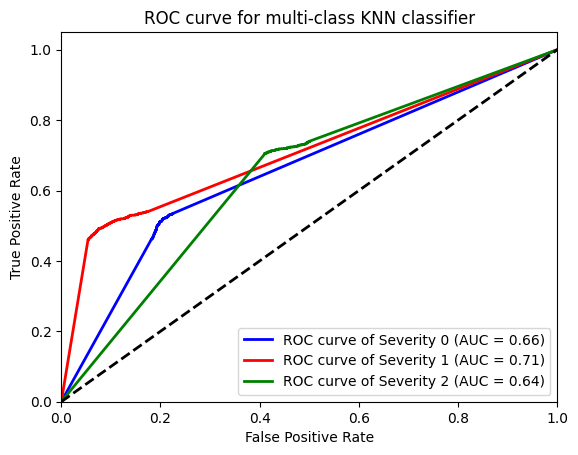

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize


# Calculate the predicted probabilities of each class
y_pred_prob = clf.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute the ROC curve and area under the curve (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of Severity %d (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot the chance line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class KNN classifier')
plt.legend(loc="lower right")
plt.show()

In [5]:
from sklearn.metrics import f1_score, recall_score, precision_score
print("Recall: " + str(recall_score(y_test, y_pred, average = None)))
print("Precision: " + str(precision_score(y_test, y_pred, average = None, zero_division = 0)))
print("The F1 score for each class can be represented as such: ")
print(f1_score(y_test, y_pred, average=None))

Recall: [0.46391239 0.45989559 0.70578231]
Precision: [0.45821042 0.9047619  0.32668591]
The F1 score for each class can be represented as such: 
[0.46104378 0.6098175  0.44663677]


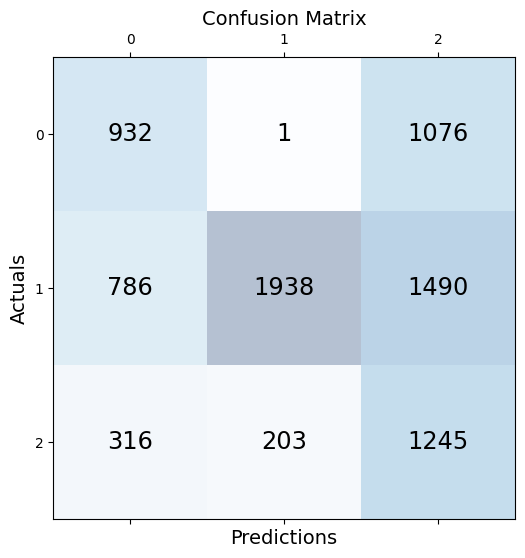

In [6]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

## PCA Find Best N_Componets, my normalization

In [7]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

X_train = images_train
y_train = labels_train
X_test = images_test
y_test = labels_test

list_balanced_accuracies_myNorm = []
pca_list = []



for i in range(10, 500, 10):
    n_PCA_components = i
    pca = PCA(n_components=n_PCA_components)
    train_PCA = pca.fit_transform(X_train)
    train_PCA = pca.inverse_transform(train_PCA)
    
    # train a Naive Bayes classifier
    clf = GaussianNB()
    clf.fit(train_PCA, y_train)

    # evaluate the classifier on the test data
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
    print('Accuracy:', accuracy)
    print("Balanced Accuracy:", balanced_accuracy)
    print()

    list_balanced_accuracies_myNorm.append(balanced_accuracy)
    pca_list.append(i)

Accuracy: 0.47777638662827093
Balanced Accuracy: 0.4790520607310171

Accuracy: 0.4636283961437336
Balanced Accuracy: 0.452163584284158

Accuracy: 0.4564917991736572
Balanced Accuracy: 0.4623893169797067

Accuracy: 0.4738950795041943
Balanced Accuracy: 0.49346041435418314

Accuracy: 0.48729184925503943
Balanced Accuracy: 0.5022699317326981

Accuracy: 0.48916990108927005
Balanced Accuracy: 0.5016086096630623

Accuracy: 0.49092274946788533
Balanced Accuracy: 0.5047819909459971

Accuracy: 0.4915487667459622
Balanced Accuracy: 0.5053688204972542

Accuracy: 0.49355202203580817
Balanced Accuracy: 0.5065653096809405

Accuracy: 0.49517966695880805
Balanced Accuracy: 0.5080507655258485

Accuracy: 0.49793414298234634
Balanced Accuracy: 0.5125922367434401

Accuracy: 0.4980593464379617
Balanced Accuracy: 0.5128449753885294

Accuracy: 0.49981219481657696
Balanced Accuracy: 0.5164931794864539

Accuracy: 0.5009390259171154
Balanced Accuracy: 0.5180909636180684

Accuracy: 0.5021910604732691
Balanced Ac

Best PCA Components Values:  450
Balanced Accuracy:  0.5261135398887608


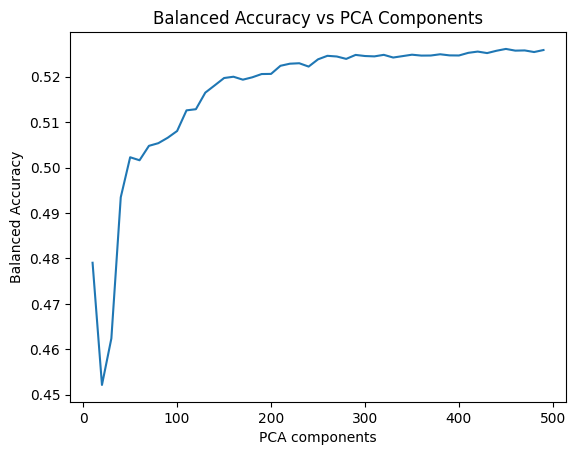

In [8]:
# Balanced Accuracy vs n_components for PCA
plt.plot(pca_list, list_balanced_accuracies_myNorm)
plt.xlabel('PCA components')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy vs PCA Components')

bestPCA = np.argmax(list_balanced_accuracies_myNorm)
print("Best PCA Components Values: ", pca_list[bestPCA])
print("Balanced Accuracy: ", list_balanced_accuracies_myNorm[bestPCA])

In [9]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

X_train = stupid_images_train
y_train = stupid_labels_train
X_test = stupid_images_test
y_test = stupid_labels_test


bestN = np.argmax(list_balanced_accuracies_myNorm)


n_PCA_components = pca_list[bestN]
pca = PCA(n_components=n_PCA_components)
train_PCA = pca.fit_transform(X_train)
train_PCA = pca.inverse_transform(train_PCA)

# train a Naive Bayes classifier
clf = GaussianNB()
clf.fit(train_PCA, y_train)

# evaluate the classifier on the test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print()



Accuracy: 0.49931138099411543
Balanced Accuracy: 0.48267289546091385



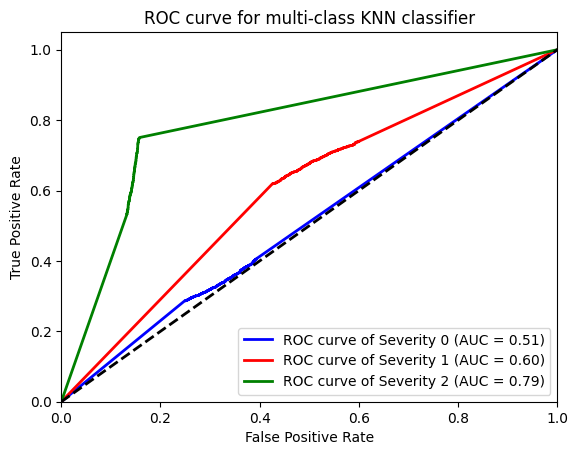

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize


# Calculate the predicted probabilities of each class
y_pred_prob = clf.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute the ROC curve and area under the curve (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of Severity %d (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot the chance line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class KNN classifier')
plt.legend(loc="lower right")
plt.show()

In [11]:
from sklearn.metrics import f1_score, recall_score, precision_score
print("Recall: " + str(recall_score(y_test, y_pred, average = None)))
print("Precision: " + str(precision_score(y_test, y_pred, average = None, zero_division = 0)))
print("The F1 score for each class can be represented as such: ")
print(f1_score(y_test, y_pred, average=None))

Recall: [0.28924647 0.62091837 0.53785385]
Precision: [0.34698682 0.58132314 0.48747017]
The F1 score for each class can be represented as such: 
[0.31549658 0.60046873 0.5114241 ]


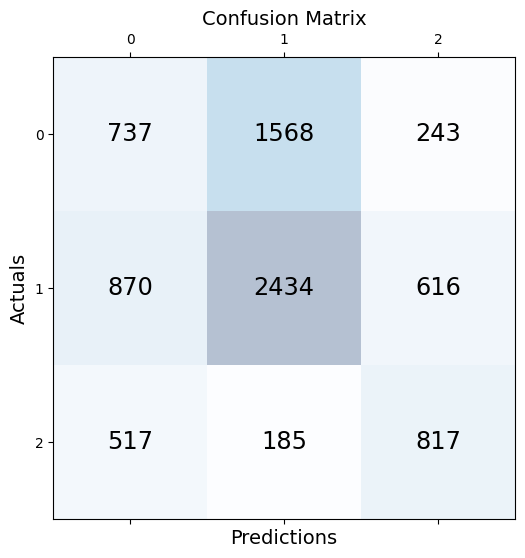

In [12]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

## Naive Bayes Normal

In [13]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

X_train = stupid_images_train
y_train = stupid_labels_train

X_test = stupid_images_test
y_test = stupid_labels_test


# train a Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# evaluate the classifier on the test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)
print("Balanced Accuracy:", balanced_accuracy)

Accuracy: 0.4925503943908852
Balanced Accuracy: 0.4684125014770176


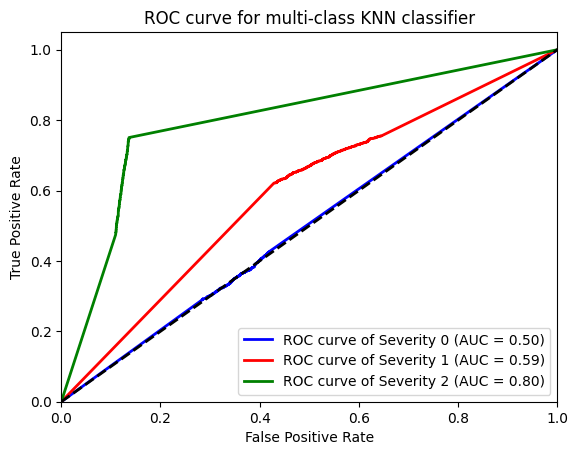

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize


# Calculate the predicted probabilities of each class
y_pred_prob = clf.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute the ROC curve and area under the curve (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of Severity %d (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot the chance line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class KNN classifier')
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.metrics import f1_score, recall_score, precision_score
print("Recall: " + str(recall_score(y_test, y_pred, average = None)))
print("Precision: " + str(precision_score(y_test, y_pred, average = None, zero_division = 0)))
print("The F1 score for each class can be represented as such: ")
print(f1_score(y_test, y_pred, average=None))

Recall: [0.29277865 0.62397959 0.48847926]
Precision: [0.32210708 0.58044613 0.50926561]
The F1 score for each class can be represented as such: 
[0.30674342 0.60142611 0.49865591]


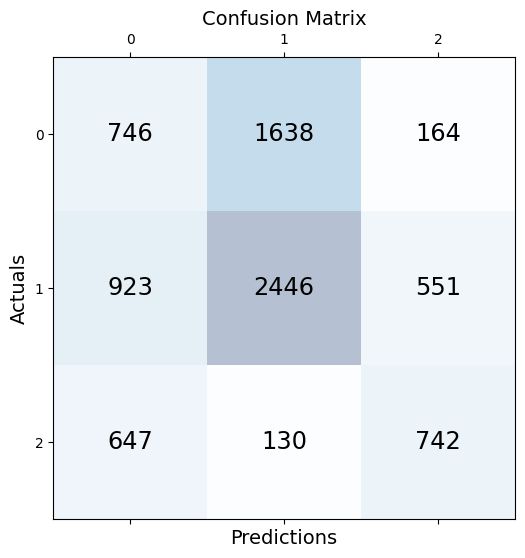

In [16]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

## Naive Bayes PCA Find Best N_Components

In [22]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

X_train = stupid_images_train
y_train = stupid_labels_train
X_test = stupid_images_test
y_test = stupid_labels_test

list_balanced_accuracies = []
pca_list = []



for i in range(10, 500, 10):
    n_PCA_components = i
    pca = PCA(n_components=n_PCA_components)
    train_PCA = pca.fit_transform(X_train)
    train_PCA = pca.inverse_transform(train_PCA)
    
    # train a Naive Bayes classifier
    clf = GaussianNB()
    clf.fit(train_PCA, y_train)

    # evaluate the classifier on the test data
    y_pred = clf.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
    print("Balanced Accuracy:", balanced_accuracy)
    print()

    list_balanced_accuracies.append(balanced_accuracy)
    pca_list.append(i)

Balanced Accuracy: 0.40816474232372846

Balanced Accuracy: 0.4500911530865448

Balanced Accuracy: 0.5138212977498692

Balanced Accuracy: 0.5116737141506728

Balanced Accuracy: 0.4991538799142486

Balanced Accuracy: 0.49197346432369476

Balanced Accuracy: 0.49655791597035837

Balanced Accuracy: 0.5019937627656522

Balanced Accuracy: 0.5005884860147533

Balanced Accuracy: 0.49866477608413096

Balanced Accuracy: 0.49907222194088546

Balanced Accuracy: 0.49808325315237756

Balanced Accuracy: 0.49722215188805047

Balanced Accuracy: 0.49813199473337716

Balanced Accuracy: 0.49712994378893

Balanced Accuracy: 0.4953060380479735

Balanced Accuracy: 0.4951104387164295

Balanced Accuracy: 0.49289111426208204

Balanced Accuracy: 0.492433871811752

Balanced Accuracy: 0.4914389949528199

Balanced Accuracy: 0.4914455360307895

Balanced Accuracy: 0.4920217838996641

Balanced Accuracy: 0.4909353319491568

Balanced Accuracy: 0.49081463851049106

Balanced Accuracy: 0.4892494218531085

Balanced Accuracy:

ValueError: x and y must have same first dimension, but have shapes (29,) and (49,)

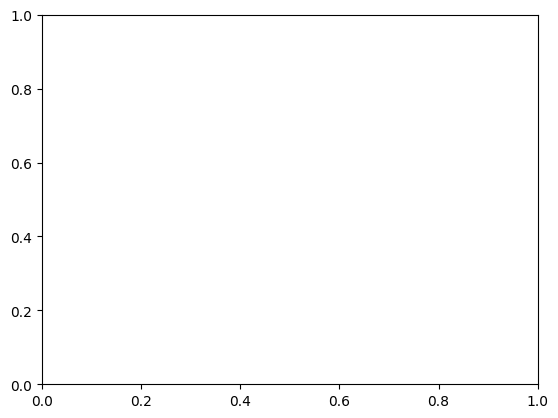

In [ ]:
# Balanced Accuracy vs n_components for PCA
plt.plot(pca_list, list_balanced_accuracies)
plt.xlabel('PCA components')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy vs PCA Components')

bestPCA = np.argmax(list_balanced_accuracies)
print("Best PCA Components Values: ", pca_list[bestPCA])
print("Balanced Accuracy: ", list_balanced_accuracies[bestPCA])

ValueError: x and y must have same first dimension, but have shapes (29,) and (49,)

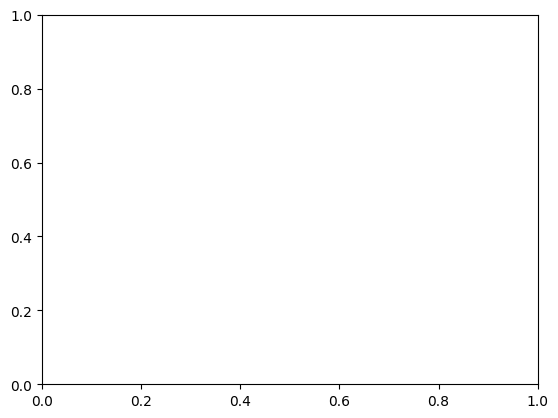

In [ ]:
# Balanced Accuracy vs n_components for PCA
plt.plot(pca_list, list_balanced_accuracies, color='r',label='Normalization1')
plt.plot(pca_list, list_balanced_accuracies_myNorm, color='g', label='Normalization2')
plt.xlabel('PCA components')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy vs PCA Components')
plt.legend()

bestPCA = np.argmax(list_balanced_accuracies)
print("Best PCA Components Values: ", pca_list[bestPCA])
print("Balanced Accuracy: ", list_balanced_accuracies[bestPCA])

## Naive Bayes with PCA on best n_components

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

X_train = stupid_images_train
y_train = stupid_labels_train
X_test = stupid_images_test
y_test = stupid_labels_test


bestN = np.argmax(list_balanced_accuracies)
print(bestN)

n_PCA_components = pca_list[bestN]
pca = PCA(n_components=n_PCA_components)
train_PCA = pca.fit_transform(X_train)
train_PCA = pca.inverse_transform(train_PCA)

# train a Naive Bayes classifier
clf = GaussianNB()
clf.fit(train_PCA, y_train)

# evaluate the classifier on the test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print("Balanced Accuracy:", balanced_accuracy)
print()



Balanced Accuracy: 0.5140930689893823



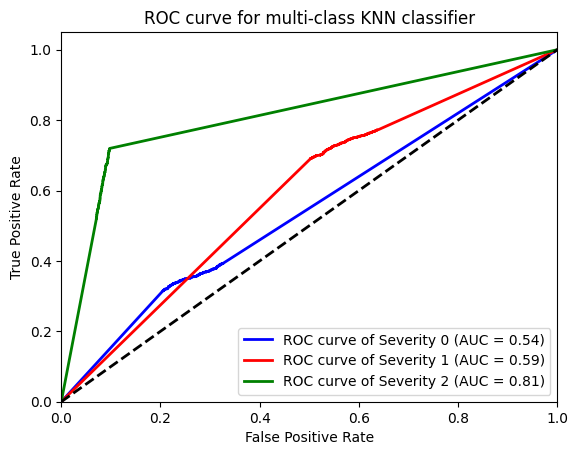

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize


# Calculate the predicted probabilities of each class
y_pred_prob = clf.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute the ROC curve and area under the curve (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of Severity %d (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot the chance line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class KNN classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score
print("Recall: " + str(recall_score(y_test, y_pred, average = None)))
print("Precision: " + str(precision_score(y_test, y_pred, average = None, zero_division = 0)))
print("The F1 score for each class can be represented as such: ")
print(f1_score(y_test, y_pred, average=None))

Recall: [0.31789639 0.69311224 0.53127057]
Precision: [0.41731066 0.56900524 0.63493312]
The F1 score for each class can be represented as such: 
[0.36088216 0.62495687 0.57849462]


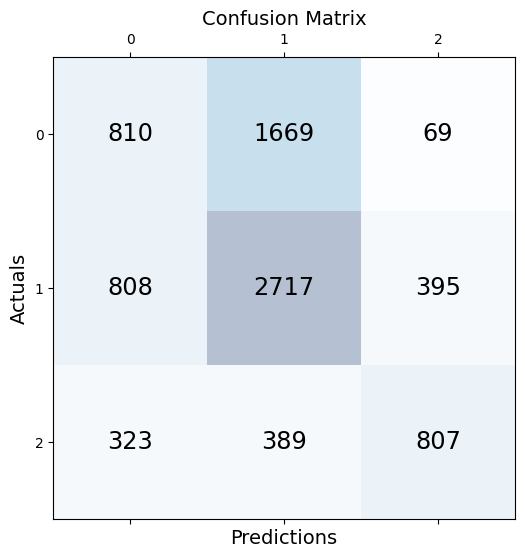

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()